# 第10回 教師なし学習


[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slt666666/biostatistics_text_wed/blob/main/source/_static/colab_notebook/chapter10.ipynb)

※Web上ではテーブルや記号など一部LaTeXが反映されず見にくくなってしまっていますが、Google Colabだとちゃんと見えます。

## はじめに

ここまで扱ってきた線形モデルでは、収穫量を肥料の量や圃場効果から説明する様な形で、応答変数$(Y)$を説明変数$(X_1, X_2, ... X_k)$で説明するモデルを構築してきました。

$収穫量(Y) = \beta_0 + 肥料の効果(X_1) + 圃場(X_2)\$

この様なモデルを作る事が出来れば、肥料や圃場の情報から収穫量を予測する事が出来ます。

本項では、観察データにおいて、特徴(説明変数)$X_1, X_2, ..., X_k$のみ得られた場合の統計手法について扱います。

この場合、応答変数$Y$を持たないので、何かを予測することは目的にはなりません。

観測された特徴$X_1, X_2, ..., X_k$について調べることで、データを可視化したり、観測値をグループ分けすることで何か知見を得ることが目的になります。

この様な状況では**教師なし学習**と呼ばれる技術が用いられます。

そこで、教師あり学習・教師なし学習の違いや、教師なし学習でよく用いられる主成分分析やクラスタリングと呼ばれる手法について学びます。

## 教師あり学習・教師なし学習

大量のデータからパターンやルールを学習し、未知のデータに対して予測や判断を行う技術を機械学習と呼びます。

教師あり学習と教師なし学習は、機械学習における２つの主要な手法の分類になります。

データに正解があるかどうかで区別され、教師あり学習は正解が与えられたデータで予測モデルを学習させ、教師なし学習は、正解の与えられていないデータからパターンや構造を発見します。

### 教師あり学習

教師あり学習では、データに正解を与えた状態で予測モデルを構築します。

これまで線形回帰などで量的な形質を説明したり、一般化線形モデルを用いて質的な形質を説明するモデルを構築しましたが、これは教師あり学習になります。

このモデルを用いて新しいデータの正解を予測したり、分類することが目的になります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/teacher.png?raw=true" alt="title" height="250px">

例えば線形回帰で予測を行う場合だと、

下記の様な、与えた肥料の量・気温毎の収穫量のデータが与えられているときに、

このデータから回帰予測式を作り、肥料の量と気温から収穫量を予測してみます。

In [ ]:
# データの読み込み
data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter10_lm.csv")
head(data)

,fertilizer,temperature,yield
,<int>,<int>,<dbl>
1,100,17,239.6667
2,100,16,250.5455
3,200,16,241.7778
4,200,18,270.0000
5,300,17,261.8889
6,300,15,243.8889


回帰分析は`lm`関数で実施できるので、まずは回帰式を作成してみます。

```
result <- lm(従属変数 ~ 説明変数1 + 説明変数2, data = data)
summary(result)
```

In [ ]:
# lm関数で回帰分析を実施
result <- lm(yield ~ fertilizer + temperature, data=data)
summary(result)


Call:
lm(formula = yield ~ fertilizer + temperature, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.6342 -14.0400   0.1796  18.0513  27.6457 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 58.60258   18.71947   3.131  0.00364 ** 
fertilizer   0.13885    0.03973   3.495  0.00137 ** 
temperature 10.32665    0.77280  13.363 7.24e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.46 on 33 degrees of freedom
Multiple R-squared:  0.8516,	Adjusted R-squared:  0.8426 
F-statistic: 94.66 on 2 and 33 DF,  p-value: 2.141e-14


これで$収穫量 = 58.60258 + 肥料の量 \times 0.13885 + 気温 \times 10.32665$という予測式が出来たので、

例えば肥料の量$200g$、気温$25$度の時の収穫量は…

In [ ]:
# 肥料が200g, 気温25度の収穫量を回帰式から求める
58.60258 + 200 * 0.13885 + 25 * 10.32665

[1] 344.5388

と予測できます。

教師あり学習は数値的な予測だけではなく、分類を行う場合もあります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/teacher2.png?raw=true" alt="title" height="250px">

これが教師あり学習になります。本講義では線形モデルを主に扱いましたが、教師あり学習を行う方法には様々な手法が存在しており、線形モデルはその１つに過ぎません。

基本的な手法は下記の本等で学ぶ事が出来ます。

https://www.statlearning.com/ (英語だと無料) (日本語訳は[Rによる統計的学習入門](https://www.asakura.co.jp/detail.php?book_code=12224&srsltid=AfmBOopvxX3GAJdDoOamTSdigYybF2TpVUfh8wqSPHsJcW5r5yXMwVAz))

個人的には検定等と比べて非常に面白い分野・技術だと思っているので、興味があれば見てみてください。

### 教師なし学習

一方、教師なし学習とは、データに正解を与えない状態で学習させる手法になります。

先ほどの診断の例で考えてみると、何の症例かは不明だとしても、体温や白血球数等の情報から得られたデータをグループ分けすることで、どの様なパターンの症状の人がいるのかを調べたりします。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/noteacher.png?raw=true" alt="title" height="120px">

多種類のデータを集約する手法である**主成分分析**や、データ間の類似度に基づいて、データをグループ分けする手法である**クラスタリング**が該当します。

本講義では扱いませんが、GAN（敵対的生成ネットワーク）なども教師なし学習の技術の１つです。

生物学において、教師なし学習が活用される例としては、

ある処理を行った生物の、遺伝子の発現データを集約して、多数の遺伝子をグループ分けしたり、

ゲノム情報に基づく種のクラスタリングなどが挙げられます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/cluster_example.png?raw=true" alt="title" height="180px">


## 主成分分析

まずは教師なし学習の代表的な手法である主成分分析を扱います。

主成分分析は、ざっくりと言うと、複数の説明変数を１つ１つ独立に扱うのではなく、出来るだけ情報を失わないようにまとめて少ない変数に変換して取り扱うことを試みる分析手法になります。

例えば

$y = a_1x_1 + a_2x_2 + a_3x_3 + ... + a_{100}x_{100}$

と表されるものを、

$y = b_1z_1 + b_2z_2 + b_3z_3$

と大量の変数$x$をいくつかの**主成分**$z$にまとめて、よりシンプルな式にしていくイメージです。

上式だと第1主成分、第2主成分、第3主成分で式をまとめている形になります。

主成分分析はデータを可視化する際や、多重共線性が生じている際の重回帰分析において強力な手法となります。


まずは具体例で見ていきます。

下記に178種類の様々なワインに含まれる13の成分の量を測定したデータがあります。

Alcohol：アルコール, Malic acid：リンゴ酸, Ash：灰分, Alcalinity of ash：灰分アルカリ度, Magnesium：マグネシウム, Total phenols：総フェノール, Flavanoids：フラバノイド, Nonflavanoid phenols：非フラバノイドフェノール
, Proanthocyanins：プロアントシアニン, Color intensity：色の濃さ, Hue：色相, OD280/OD315 of diluted wines：希釈したワインのOD280/OD315, Proline：プロリン

これらの成分を基にして、178種のワインをいくつかのグループに分けようと考えたとします。



In [ ]:
# ワインの成分データを読み込む
data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter10_wine_unknown.csv")
head(data)

,Alcohol,Malic.acid,Ash,Alcalinity.of.ash,Magnesium,Total.phenols,Flavanoids,Nonflavanoid.phenols,Proanthocyanins,Color.intensity,Hue,OD.diluted.wines,Proline
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


このデータの特徴を調べるにはグラフ化するのが手っ取り早いです。

まずはアルコール`Alcohol`とリンゴ酸`Malic.acid`のデータから散布図を描き、今回の標本の特徴をみてみましょう。

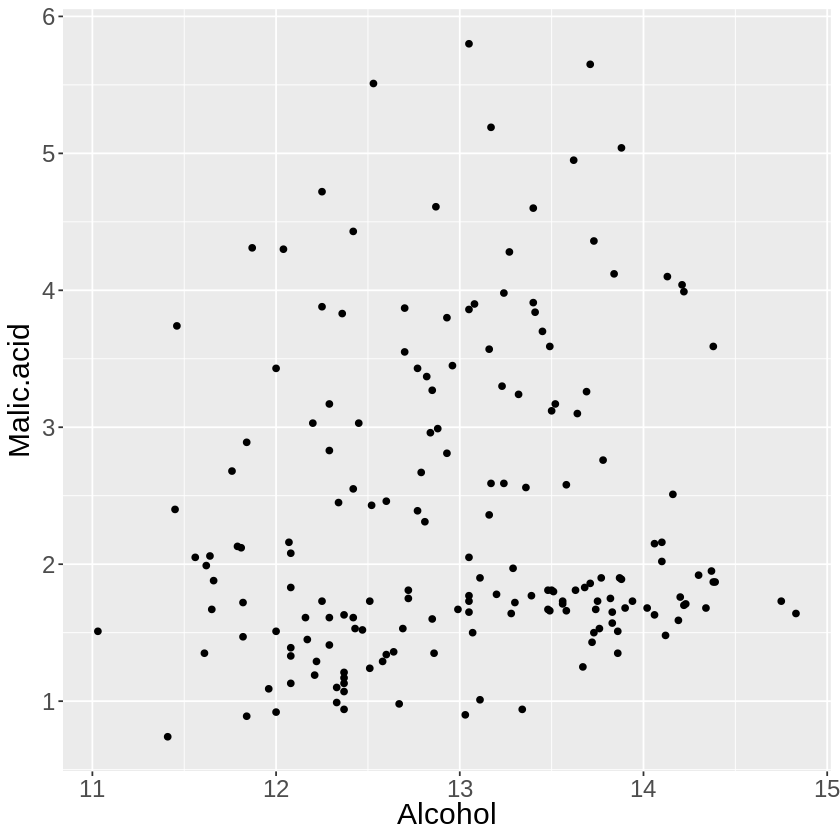

In [ ]:
# AlcoholとMalic.acidで散布図を描く
library(ggplot2)

g <- ggplot(data = data, aes(x=Alcohol, y=Malic.acid))
g <- g + geom_point()
g <- g + theme(text = element_text(size = 18))
g

アルコールとリンゴ酸の成分では、あんまり綺麗なグループ分けは出来そうにないです。

では続いてアルコール`Alcohol`と灰分`Ash`や、総フェノール`Total.phenols`や色相`Hue`など、他の成分に基づいて可視化してみましょう。



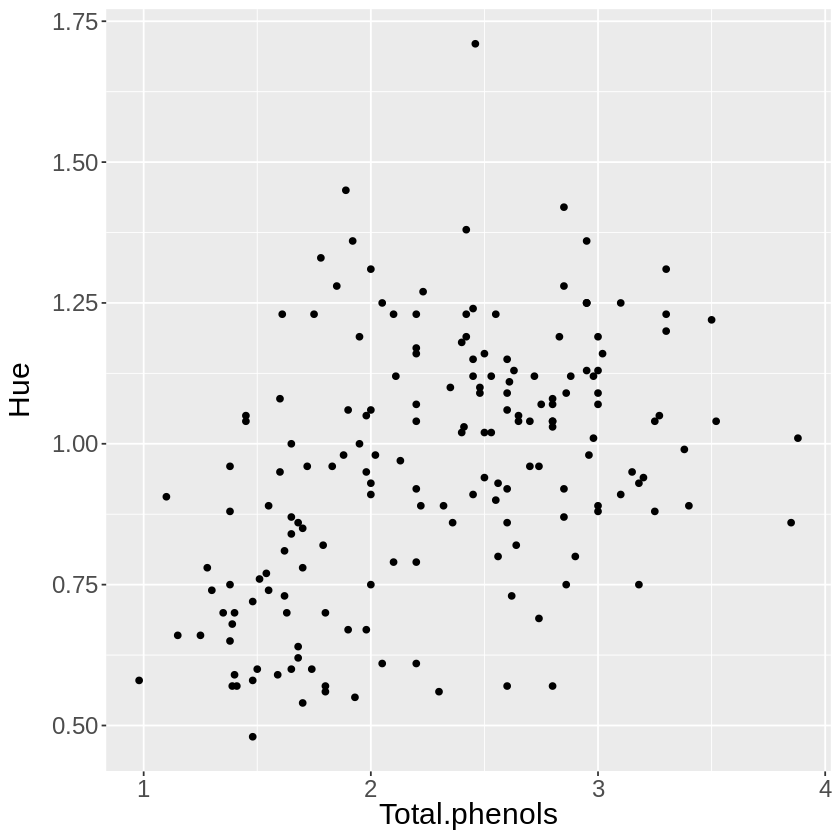

In [ ]:
# AlcoholとAshなど、他の要素で散布図を描く
g <- ggplot(data = data, aes(x=Total.phenols, y=Hue))
g <- g + geom_point()
g <- g + theme(text = element_text(size = 18))
g

どの組み合わせでも上手くワインの種類を分けられそうにはありません。

全ての組み合わせを試すには、$_{13}C_{2}=78$通りのグラフを作成する必要がありますが、

なんとなく2つの成分だけでは上手くワインをグループ分け出来なさそうです。

2つの成分だけで上手くグループ分け出来ない場合は、3つ・4つ・5つ…と複数の成分を一度に考慮してグループ分け出来ないか考えたいところですが、複数の成分の情報を同時に可視化する方法が必要になります。

しかし、現状扱えるグラフ化の手法では対応できません。

<br>

この時、主成分分析を実施することで、この13個の変数の情報を出来るだけ少ない数の変数で説明していく事が出来ます。

今回の場合だと13種類の成分の情報を少ない変数で同時にある程度考慮できる形になります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/pca.png?raw=true" alt="title" height="200px">


### Rでの主成分分析の実施

まずはイメージをつかむために、実際に主成分分析をRで実施してみます。

Rでは主成分分析を`prcomp`関数で実施する事が出来ます。

```
# prcomp関数で主成分分析
rpca <- prcomp(x=データフレーム, scale=TRUE)

# 変換された変数(主成分)を表示
rpca$x
```

In [ ]:
# prcomp関数でPCAを実施する
rpca <- prcomp(x=data, scale=TRUE)

rpca$x

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
-3.3074210,-1.43940225,-0.16527283,-0.21502463,-0.6910933491,-0.22325037,0.59474883,0.06495586,-0.63963836,-1.01808396,0.45029317,-0.5392891439,0.066052305
-2.2032498,0.33245507,-2.02075706,-0.29053874,0.2569298662,-0.92451231,0.05362434,1.02153432,0.30797798,-0.15925214,0.14225602,-0.3871456499,-0.003626273
-2.5096607,-1.02825072,0.98005406,0.72286320,0.2503269758,0.54773096,0.42301218,-0.34324787,1.17452129,-0.11304198,0.28586645,-0.0005819316,-0.021655423
-3.7464972,-2.74861839,-0.17569622,0.56638560,0.3109643979,0.11410911,-0.38225899,0.64178311,-0.05239662,-0.23873915,-0.75744764,0.2413387757,0.368444194
-1.0060705,-0.86738404,2.02098726,-0.40861314,-0.2976179585,-0.40537608,0.44282531,0.41552831,-0.32589984,0.07814604,0.52446563,0.2160546934,0.079140320
-3.0416737,-2.11643092,-0.62762537,-0.51418703,0.6302408998,0.12308335,0.40052393,0.39378261,0.15171810,0.10170891,-0.40444443,0.3783653606,-0.144747017
-2.4422005,-1.17154534,-0.97434638,-0.06564533,1.0248708712,-0.61837638,0.05274195,-0.37088763,0.45573029,-1.01370392,0.44118887,-0.1408325723,0.271013687
-2.0536438,-1.60443714,0.14587040,-1.18925327,-0.0766871685,-1.43575612,0.03228452,0.23232360,-0.12302328,-0.73353084,-0.29272910,-0.3785950548,0.109853902
-2.5038113,-0.91548847,-1.76598739,0.05611208,0.8897471068,-0.12881767,0.12493265,-0.49817262,-0.60488290,-0.17361686,0.50750129,0.6334624142,-0.141683863
-2.7458824,-0.78721703,-0.98147886,0.34839878,0.4672350615,0.16293204,-0.87189274,0.15015593,-0.22984080,-0.17891540,-0.01244307,-0.5487787841,0.042335430


主成分分析を実施することで、新しくPC1 ~ PC13の変数(第1主成分~第13主成分)が計算されました。

(※PC1 = Principle Component 1 (第1主成分)の略です)

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/pca.png?raw=true" alt="title" height="150px">


それぞれの主成分(PC1~PC13)でどのくらいの情報を捉えているかは、`summary`関数で確認できます。

```
各主成分の捉えた分散の割合を表示
summary(rpca)
```

In [ ]:
# 各主成分の説明する割合を表示
summary(rpca)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

`Proportion of Variance`が13個の変数によって生じていた分散全体の何%の情報を捉えているかを表しています。

具体的には、主成分分析によって、13個の変数の情報を捉えた変数として、

* 36.2%を説明する変数(第1主成分, PC1)
* 19.2%を説明する変数(第2主成分, PC2)
* 11.1%を説明する変数(第3主成分, PC3)
* …

と、情報の大部分を説明できる変数ができたことになります。

`biplot`関数を適用することで、第１主成分と第２主成分から成る散布図と、

各主成分が元のどの変数とどれだけ強い相関を持っているかを示す因子負荷量を図示できます。

```
biplot(prcompの結果)
```

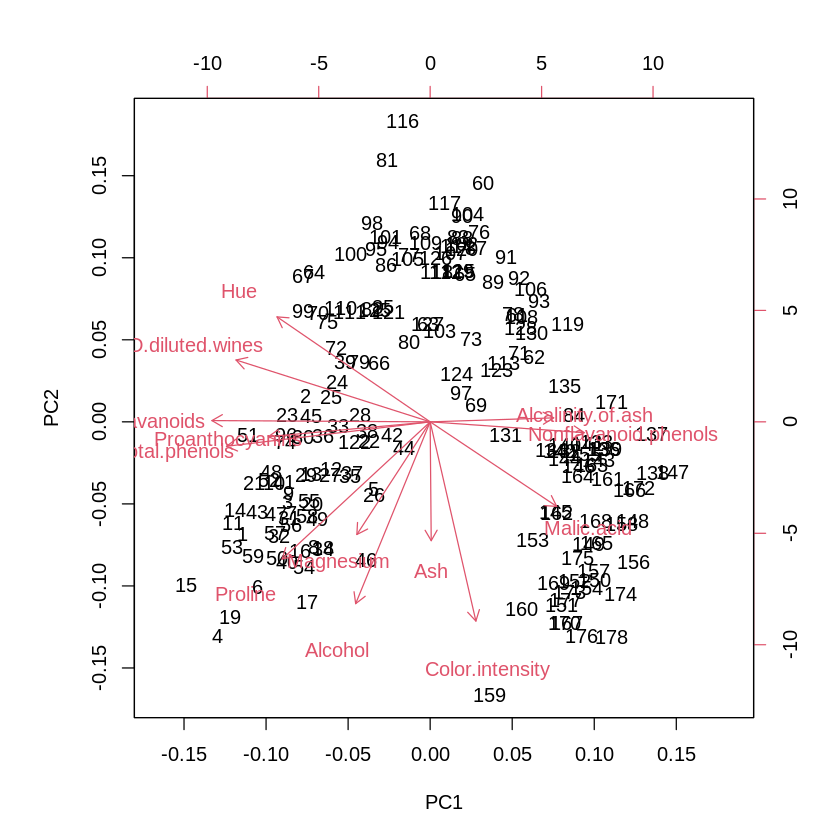

In [ ]:
# biplot関数で第１主成分・第２主成分で散布図+因子負荷量を描く
biplot(rpca)

第1主成分はデータ全体の36.2%、第2主成分は19.2%を説明しているので、データの56%の情報に基づいた散布図、と言えます。

因子負荷量を見てみると、例えば

* 第2主成分(y軸)が低いワインはAshやAlcohol, Color.intensityが高い傾向にある
* 第1主成分(x軸)が高いワインはAlcalicity.of.ashやNonflavanoid.phenolなどが高い傾向にある

といったことが分かります。13変数を総合的に見てワインを位置付けている形です。

勿論第1,2主成分だけだとデータの56%の情報だけになりますが、最初に実施したAshとMalic.acidの2変数の散布図に比べると、より多くの情報に基づいた可視化と言えます。

また、2変数だけではワインの分類が出来ませんでしたが、

この第1主成分と第2主成分の散布図を見ると、ワインの種類は3つくらいのグループに分類できそうだということが分かります。

* 第2主成分が高いグループ
* 第1主成分が高く、第2主成分が低いグループ
* 第1主成分が低く、第2主成分が低いグループ

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/group.png?raw=true" alt="title" height="350px">

実際に、このデータは3種のぶどう品種いずれかから作られた178種類のワインのデータであり、

大きくワインをグループ分けすると、ぶどう品種に基づいて3グループに分かれる、というのは十分あり得そうです。

(元データ: https://archive.ics.uci.edu/dataset/109/wine)

次のコードでぶどうの品種`class`も含めたデータが読み込めるので、成分(の56%の情報)に基づいて分けた3グループと、実際の元となったブドウ品種がどれだけ対応しているか確認してみます。

In [ ]:
# ぶどう品種データも含めたデータセットの読み込み
data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter10_wine.csv")
head(data)

,class,Alcohol,Malic.acid,Ash,Alcalinity.of.ash,Magnesium,Total.phenols,Flavanoids,Nonflavanoid.phenols,Proanthocyanins,Color.intensity,Hue,OD.diluted.wines,Proline
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,A,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


PCAを実施して得られる第1主成分と第2主成分の散布図に、ぶどうの品種で色付けしてみると

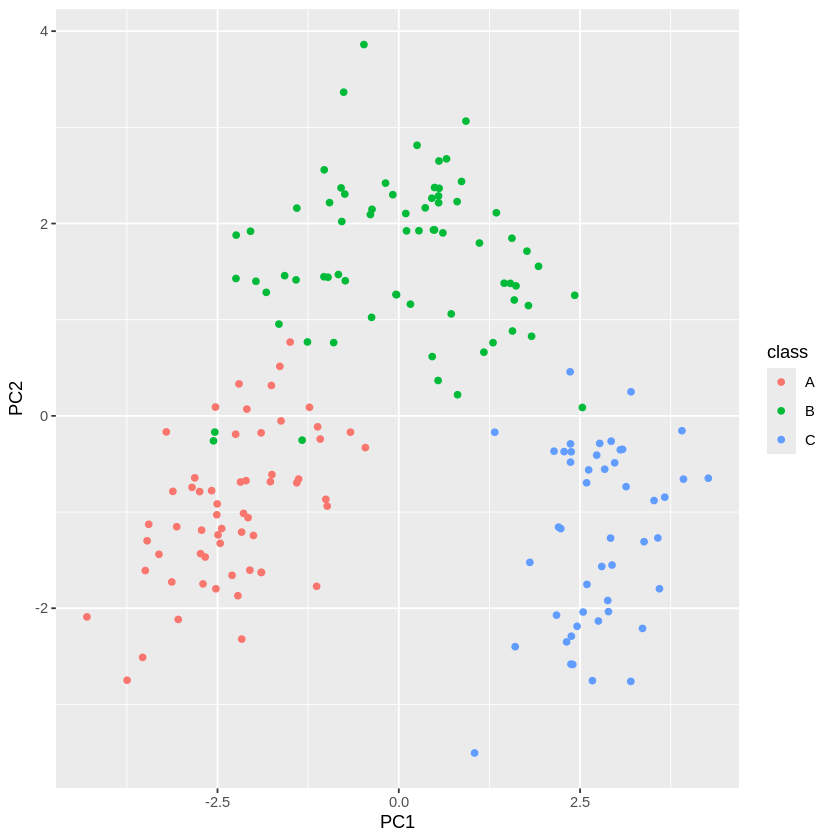

In [ ]:
library(ggplot2)

# 13成分のデータからPCAを実施
rpca <- prcomp(x=data[,2:14], scale=TRUE)

# 第1主成分と第2主成分をデータフレームに追加
data$PC1 <- rpca$x[,1]
data$PC2 <- rpca$x[,2]

# PC1とPC2の散布図をぶどう品種で色分けして描写
g <- ggplot(data = data, aes(x=PC1, y=PC2))
g <- g + geom_point(aes(colour=class))
g

主成分分析によって、ワインの13種の成分の情報を少ない変数で総合的に捉えて可視化した結果、

成分に基づいて分けられた3つのグループが、ぶどう品種由来のものだと確認できます。

この様に、主成分分析を用いることで、多数の変数から成るデータの特徴を少ない変数で可視化する事が出来ます。

### 活用例

生物学において主成分分析が活躍する場面の１つとして、遺伝子型情報の解析があります。

例えば下のコードで読み込めるデータは、様々な土地でメヒシバという植物を19サンプル採集し、各サンプルのゲノム配列を解読して得られたゲノム配列の違いを示した結果になります。

ゲノム上の各位置において、各サンプル毎に変異が入っていれば2, 入っていなければ0, ヘテロの場合は1となっています。

In [ ]:
# 遺伝子型情報の例を読み込む
data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter10_genetic_variants.csv")
head(data)

,sample,chr01_92350,chr01_1674237,chr01_1845787,chr01_2771057,chr01_3083332,chr01_4916097,chr01_4936298,chr01_5536949,chr01_5849537,⋯,chr09_54951418,chr09_55858506,chr09_56682602,chr09_56793541,chr09_57199744,chr09_57364173,chr09_60669105,chr09_62120010,chr09_62561363,chr09_65022563
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,sample1,0,2,0,0,0,2,0,0,0,⋯,0,0,2,0,0,0,0,2,0,0
2,sample2,0,2,0,2,0,2,0,0,0,⋯,0,0,2,0,0,0,0,2,0,0
3,sample3,0,2,0,2,0,0,0,0,0,⋯,0,0,2,0,0,0,0,1,0,0
4,sample4,0,2,0,2,0,2,0,0,0,⋯,0,0,2,0,0,0,0,2,0,0
5,sample5,0,0,0,2,0,2,0,0,0,⋯,0,0,0,0,0,0,0,2,0,0
6,sample6,0,0,0,2,0,2,0,0,0,⋯,0,0,0,0,0,0,0,2,0,0


この情報に基づいて、19サンプルをゲノム配列が近いものでグループ分けしたいとします。

505箇所のゲノム上の変異の情報をそのまま扱おうとすると大変ですが、主成分分析で全体の情報を要約した変数にまとめていくことで、全ての情報を扱う事が出来ます。

1列目はサンプル名なので、2列目以降のデータ`data[,2:506]`を使用してPCAを実施してみましょう。

```
# prcomp関数で主成分分析
rpca <- prcomp(x=データフレーム, scale=TRUE)

# 各主成分の捉えた分散の割合を表示
summary(rpca)
```

In [ ]:
# ゲノム情報に対しPCAを実施
rpca <- prcomp(x=data[,2:506], scale=TRUE)

summary(rpca)

Importance of components:
                           PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     16.1591 5.3605 5.00036 4.77797 4.73191 4.54865 4.40400
Proportion of Variance  0.5171 0.0569 0.04951 0.04521 0.04434 0.04097 0.03841
Cumulative Proportion   0.5171 0.5740 0.62347 0.66868 0.71302 0.75399 0.79239
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.11218 4.03600 3.89022 3.77317 2.97980 2.90458 2.64631
Proportion of Variance 0.03349 0.03226 0.02997 0.02819 0.01758 0.01671 0.01387
Cumulative Proportion  0.82588 0.85814 0.88810 0.91630 0.93388 0.95058 0.96445
                          PC15    PC16    PC17    PC18      PC19
Standard deviation     2.49144 2.26023 1.83220 1.81078 9.041e-15
Proportion of Variance 0.01229 0.01012 0.00665 0.00649 0.000e+00
Cumulative Proportion  0.97674 0.98686 0.99351 1.00000 1.000e+00

ゲノムデータに対し主成分分析を実施すると、第1主成分で51.7%を説明し、第2主成分で5.7%の情報を説明できることが分かります。

第1, 第2主成分で散布図を描いてみると

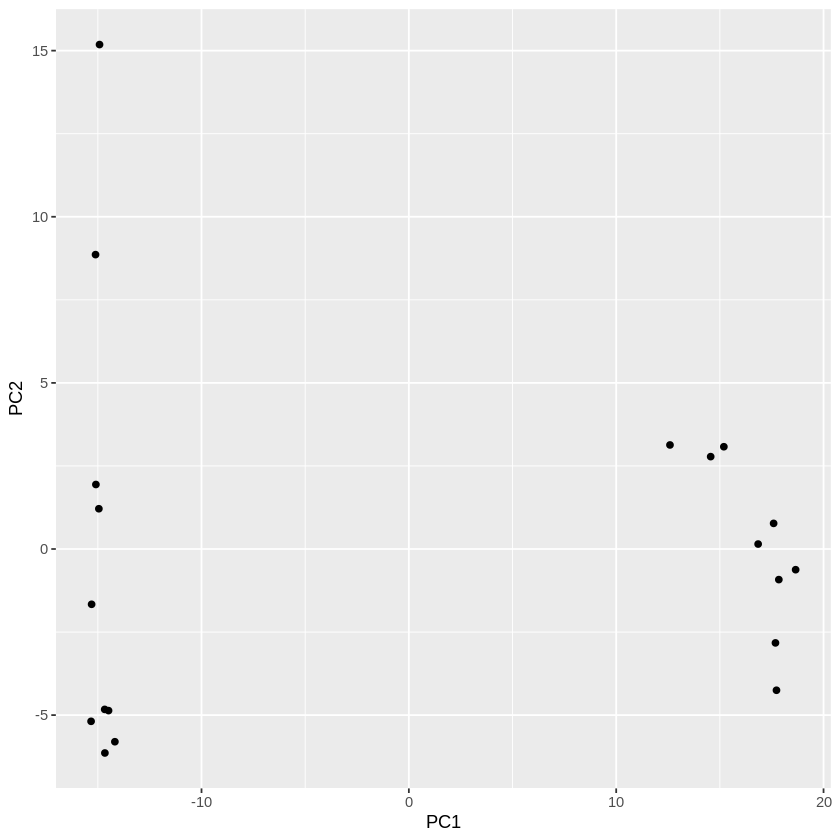

In [ ]:
library(ggplot2)

# PC1とPC2の散布図を描写
g <- ggplot(data = rpca$x, aes(x=PC1, y=PC2))
g <- g + geom_point()
g

この様に、第1主成分が大きいグループと小さいグループに分かれ、第1主成分が小さいグループの中には、第2主成分が大きいグループと小さいグループにさらに分かれそうです。

実際、今回の19サンプルには、コメヒシバとメヒシバという2種混ざっており、これが第1主成分で綺麗に分かれています。

また、メヒシバのサンプルは、様々な地点から採集しており、環境への適応に応じたゲノム配列の変化を第2主成分が示しているのでは…？などと考察できます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/group2.png?raw=true" alt="title" height="300px">


### 主成分の計算について

ここまではRの関数で主成分分析を行ってきましたが、実際にどの様な計算が為されているかを簡単に紹介しておきます。

以下の様なデータがあるとします。

\begin{array}{ccccc}  \hline
 変数 & x_1 & x_2 & ... & x_p \\ \hline
 1 & x_{11} & x_{21} & ... & x_{p1} \\
 2 & x_{12} & x_{22} & ... & x_{p2} \\
 3 & x_{13} & x_{23} & ... & x_{p3} \\
 ... & ... & ... & ... & ... & ... \\
 n & x_{1n} & x_{2n} & ... & x_{pn} \\ \hline
\end{array}

まず、$x_1 \sim x_p$の分散共分散行列$S$を求めます。

$S = \begin{bmatrix}
s_1^2 & s_{12} & ... & s_{1p} \\
s_{12} & s_2^2 & ... & s_{2p} \\
\vdots & & & \vdots \\
s_{1p} & s_{2p} & ... & s_p^2
\end{bmatrix}$

※$s_i^2$は$x_i$の分散、$s_{ij}$は$x_i, x_j$の共分散

そしてこの分散共分散行列$S$の固有値$\lambda$を求めます。

固有値$\lambda$は下記の行列式を解くことで求められます。

$\begin{vmatrix}
  s_1^2 - \lambda & s_{12} & ... & s_{1p} \\
  s_{12} & s_2^2 - \lambda & ... & s_{2p} \\
  \vdots & & & \vdots \\
  s_{1p} & s_{2p} & ... & s_p^2 - \lambda
\end{vmatrix} = 0$

この行列式を解くと、固有値$\lambda$は$p$個の解をもち、導出された$p$個の固有値は、

$\lambda_1 \ge \lambda_2 \ge \lambda_3 ... \ge \lambda_p \ge 0$

と大きい順に並べられます。

この大きい固有値に属する固有ベクトルから、第１主成分の係数、第２主成分の係数、という順で係数が得られます。


$\begin{bmatrix}
s_1^2 & s_{12} & ... & s_{1p} \\
s_{12} & s_2^2 & ... & s_{2p} \\
\vdots & & & \vdots \\
s_{1p} & s_{2p} & ... & s_p^2
\end{bmatrix}
\begin{bmatrix}
a_{i1} \\
a_{i2} \\
\vdots \\
a_{ip}
\end{bmatrix}=\lambda_i
\begin{bmatrix}
a_{i1} \\
a_{i2} \\
\vdots \\
a_{ip}
\end{bmatrix}$

※条件として$a_{i1}^2+a_{i2}^2+\cdots+a_{ip}^2 = 1$

最も大きい固有値$\lambda_1$の固有ベクトル$(a_{11}, a_{12}, a_{13}, ..., a_{1p})$に対し、

**第1主成分**$z_1 = a_{11}x_1 + a_{12}x_2 + a_{13}x_3 + \cdots + a_{1p}x_p$と得る事が出来ます。

同じように2番目に大きい固有値$\lambda_2$とその固有ベクトルから第2主成分が求められ、3番目に大きい…と続けて求められます。

### 寄与率

先ほど、第1主成分で36%を説明でき、第2主成分で19%を説明できる...という値がありました。

この何%説明できるかの値を主成分の**寄与率**と呼びます。

寄与率は下記の式で計算できます。

寄与率$ = \dfrac{\lambda_i}{\lambda_1 + \lambda_2 + \lambda_3 + \cdots + \lambda_p}$

<br>

線形代数の講義を取った方は固有値とか固有ベクトルとかを学んだかと思いますが、主成分分析はその活用例の１つになります。

今回は算出方法だけ紹介したので、なぜ固有値から主成分が算出できるかは[応用が見える線形代数](https://www.iwanami.co.jp/book/b496844.html)などを参照してみてください。

もちろんRでは固有値や固有ベクトルの算出も`eigen`関数などを用いて実施できるので参考に載せておきます。


In [ ]:
# データから固有値等を算出、各主成分の寄与率を求める
data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter10_wine_unknown.csv")

# cov関数で分散共分散行列を計算する
scaled_data <- scale(data)
cov_matrix <- cov(scaled_data)

# 固有値・固有ベクトルをeigen関数で計算
eigen_cov_matrix <- eigen(cov_matrix)

# 最大の固有値(この固有ベクトルから第1主成分が算出できる)
# eigen_cov_matrix$values[1]

# 最大の固有値における固有ベクトル
# eigen_cov_matrix$vectors[,1]

# 第一主成分の寄与率
eigen_cov_matrix$values[1] / sum(eigen_cov_matrix$values)

[1] 0.3619885

## クラスタリング

データをグループ分けする教師なし学習の手法としては、**クラスタリング**と呼ばれる手法もあります。

主成分分析では変数を要約する(少数の変数にデータをまとめる)ことで、データ全体の特徴を捉えました。

クラスタリングでは、全てのデータに基づき、サンプル同士のデータ類似度(距離)を計算して、近いものからグループを作成していきます。

クラスタリングには大きく分けて**階層的クラスタリング**と**非階層的クラスタリング**があります。

### 階層的クラスタリング

より直感的にイメージしやすい階層的クラスタリングの方から説明していきます。

階層的クラスタリングでは、似ている組み合わせを順番にまとめていき、**樹形図**(**デンドログラム**)を作成します。

その後、完成した樹形図をもとにデータをクラスターに分割する手法となります。

<br>

例えばデータA, B, C, D, Eがあった時に、どの様にデータをまとめていくか見ていきます。

似ているデータをまとめていく手法のイメージとしては下記の様になります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/cluster1.png?raw=true" alt="title" height="750px">

こうして作成した樹形図(デンドログラム)に基づいて、データを任意の数のクラスターに分割します。

A, B, C, D, Eを3つのグループに分けたい場合は、下図の様に3つに分かれる位置で区切ります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/cluster2.png?raw=true" alt="title" height="200px">

### 類似度の計算

データをまとめて樹形図を作成する際に、まずデータの類似度を計算する必要があります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/cluster4.png?raw=true" alt="title" height="200px">

この類似度を計算する方法には様々な手法があり、

* ユークリッド距離（Euclidean）
* ミンコフスキー距離（Minkowski）
* マンハッタン距離（Manhattan）
* ...etc

等の指標が代表的なものとして扱われます。

例えばユークリッド距離はどのような計算かというと、

$A(x_{1},y_{1})$ と $B(x_{2},y_{2})$の間のユークリッド距離は、差の二乗和の平方根

$\sqrt{(x_{2}-x_{1})^{2}+(y_{2}-y_{1})^{2}}$ で計算されます。


また、点と点の間だけでなく、クラスター間の類似度を計算する方法も必要になります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/cluster3.png?raw=true" alt="title" height="200px">

この計算には、

* 最短距離法（単連結法）... 2つのクラスターの間で、最も近い個体間の距離をクラスター間の距離とする
* 最長距離法（完全連結法）...	2つのクラスターの間で、最も遠い個体間の距離をクラスター間の距離とする
* 群平均法 ... 全個体間の距離の平均をクラスター間の距離とする
* ウォード法（最小分散法）...	併合した後のクラスター内の分散の増加が最も小さくなるペアを選ぶ
* ...etc

といった様々な計算手法があります。特にウォード法は良く用いられる手法になります。

### Rでの階層的クラスタリングの実施

Rでは`dist`関数で各データ間の距離を計算し, `hclust`関数で樹形図を作成する事が出来ます。

```
#scale()関数を使ってデータを標準化
scaled_data <- scale(data)

# dist関数で距離行列を作成、デフォルトがユークリッド距離euclidean
d <- dist(scaled_data, method = "距離の種類")

# hclust関数で樹形図を作成、デフォルトが最長距離法complete
hc <- hclust(d, method = "使用メソッド")

# 作成した樹形図を作図
plot(hc)
```

先ほどのワインのデータを使用して、樹形図を作成してみましょう。

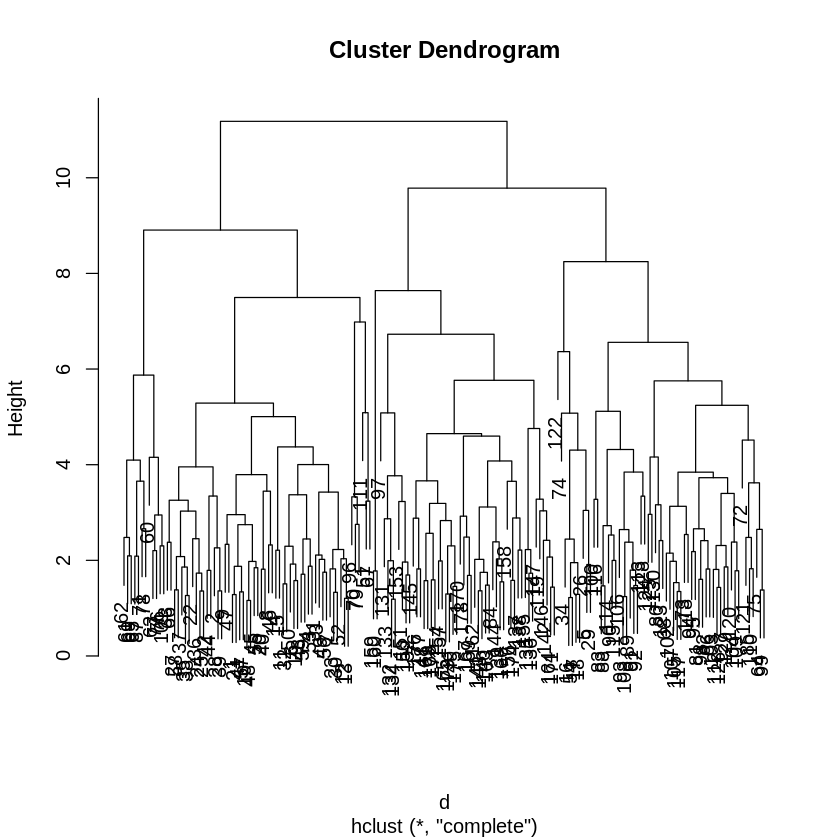

In [ ]:
# ワインのデータを使用して階層的クラスタリングを実施
data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter10_wine_unknown.csv")

scaled_data <- scale(data)
d <- dist(scaled_data)
hc <- hclust(d)
plot(hc)

この様に、`dist`関数、`hclust`関数で178種類のワインの成分情報に基づいた樹形図を作成する事が出来ました。

このクラスタリングの結果は、`cutree`関数で任意の数のクラスターに分ける事が出来ます。

```
# 樹形図を基に任意のクラスター数に分ける
clusters <- cutree(tree, k = 分割するクラスター数)

clusters
```

例えば先ほどの階層的クラスタリングの結果を基に、3つのクラスターに分割すると

In [ ]:
# cutree関数でクラスター分割を実施する
clusters <- cutree(hc, k=3)
clusters

[1] 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 2 2
 [75] 2 1 1 1 1 2 2 2 2 3 2 2 1 2 2 2 2 2 2 2 2 1 3 2 2 2 1 2 2 2 2 2 2 2 2 2 1
[112] 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

この様な形で、何番目のデータがどのクラスターに入るか、表示してくれます。

このクラスターはワインの成分に基づいて作成されたクラスターですが、どのぶどう品種(A,B,C)由来のワインかという情報と一致するのか`table`関数を用いて照らし合わせてみると…

In [ ]:
# 今回のクラスター結果と実際に基になったぶどう品種の対応を確認
data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter10_wine.csv")
table <- table(data$class, clusters)
table

   clusters
     1  2  3
  A 51  8  0
  B 18 50  3
  C  0  0 48

といった形で、A,B品種の分類は少しクラスタリング結果とは異なっていますが、概ねワインの成分に基づくクラスタリング結果と材料となったぶどうの品種が一致していることが分かります。

ちなみに、Rの`cluster`パッケージの`clusplot`という関数を使用すると、主成分分析に基づいた散布図に、視覚的にクラスターを描写してくれます。

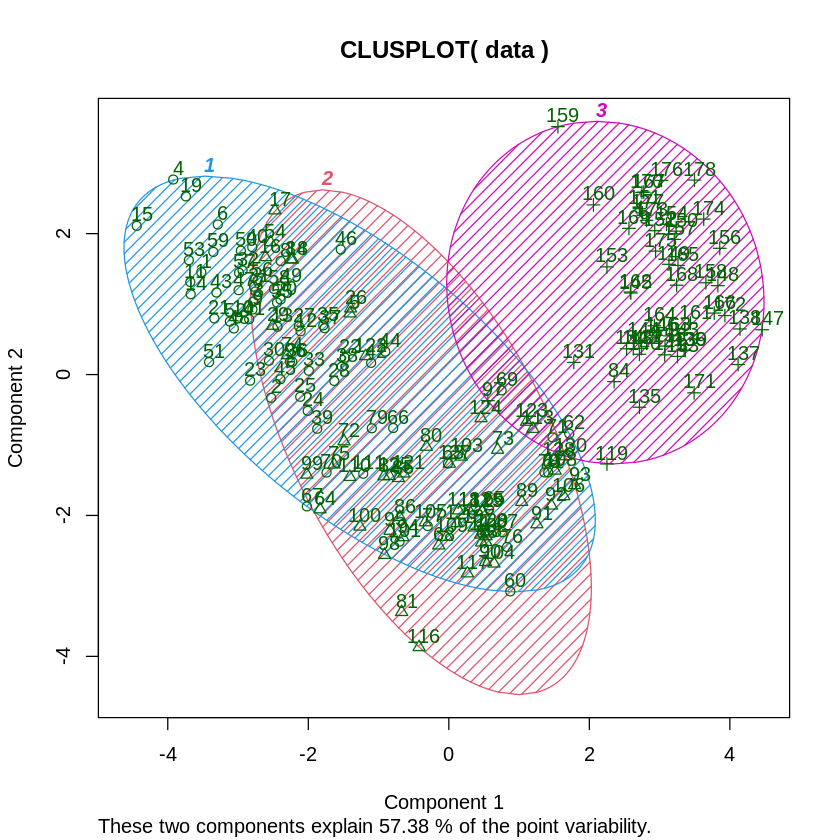

In [ ]:
# クラスタリング結果のプロット
library(cluster)
clusplot(data, clusters, color=TRUE, shade=TRUE, labels=2, lines=0)

### 非階層的クラスタリング

続いて、非階層的クラスタリングを扱います。文字通り階層を作らない手法なので、先ほどの樹形図の様なものは作成せずに、データを直接任意の数のクラスターに分割する方法になります。

今回は**k-means法**という非階層的クラスタリングの代表的な手法を扱います。

この手法を用いて、データを3つのクラスターに分割する場合、以下の様な計算が行われます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/cluster5.png?raw=true" alt="title" height="1000px">



実際の計算としては、各クラスター内での変動が最小になる様な分割方法を求めていくことになります。

先ほど紹介したユークリッド距離を使用した場合、クラスター内の変動は下式によって定義されます。

$W(C_k) = \dfrac{1}{|C_k|}\sum_{i,i'\in C_k}\sum_{j=1}^p(x_{ij}-x_{i'j})^2$

各クラスターに属するデータ点から、重心への距離の2乗の合計です。

このクラスター内の変動を全てのクラスターで足し合わせた、総クラスター内変動が出来る限り小さくなる様にK個のクラスターに分割します。

$minimize\{{\sum_{k=1}^K W(C_K)}\}$

これを解くのは最適化問題と呼ばれる問題で中々難しいので、今回はRの関数に頼ります。

(※最適化問題自体は面白い分野なので興味があれば調べてみてください。)

### Rによる非階層的クラスタリングの実施

Rの`kmeans`関数を使用することで、k-means法を用いた非階層的クラスタリングを実施する事が出来ます。

`kmeans`関数は下記の様に使用します。

```
#scale()関数を使ってデータを標準化
scaled_data <- scale(data)

# kmeans関数でクラスタリングを実施
km <- kmeans(scaled_data, centers=クラスターの数)

# クラスターの分類結果を表示
km$cluster
```

ワインのデータを使用して、非階層的クラスタリングを実施してみましょう。

In [ ]:
# ワインのデータを使用して非階層的クラスタリングを実施
data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter10_wine_unknown.csv")

scaled_data <- scale(data)
km <- kmeans(scaled_data, centers=3)
km$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 2
 [75] 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 3 1 1 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

データが1~3に分割されていることが分かります。

こちらも先ほどと同様にぶどう品種との対応や、クラスター結果の可視化が出来ます。

   
     1  2  3
  A  0 59  0
  B 65  3  3
  C  0  0 48

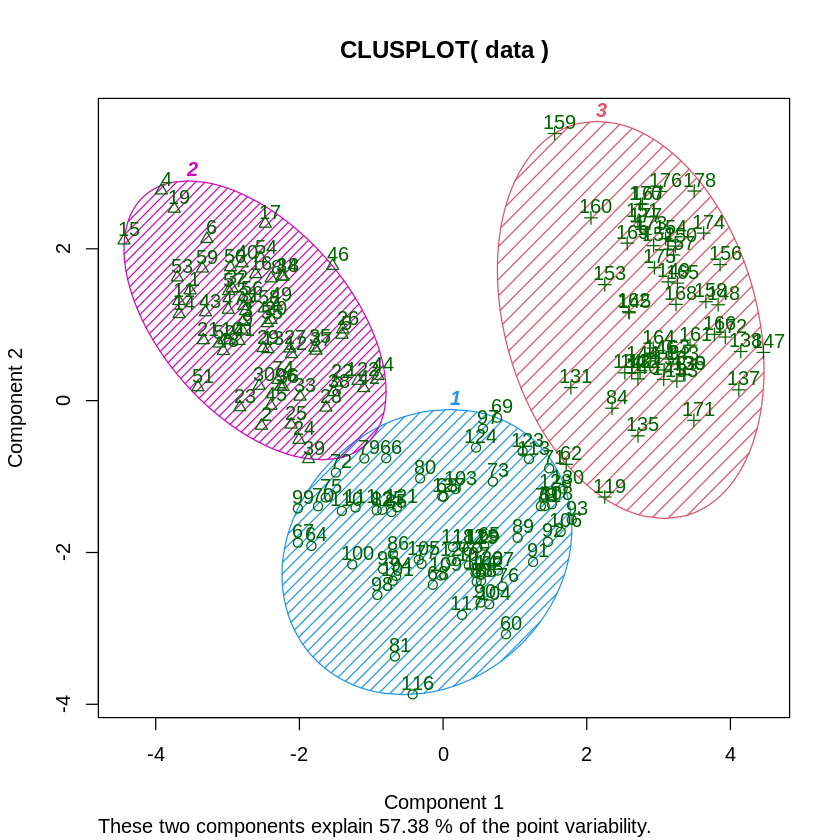

In [ ]:
# 今回のクラスター結果と実際に基になったぶどう品種の対応を確認
data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter10_wine.csv")
table <- table(data$class, km$cluster)
table

# クラスター結果の描写
library(cluster)
clusplot(data, km$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

階層的クラスタリングの時よりもよりぶどう品種ごとの分類と一致したクラスタリング結果となりました。

※ただし、ワイン製造過程の方法などが影響を与えている場合もあるので、品種と一致しているクラスタリング結果が正しいというわけではありません。

この様な形で、データセット全体の情報を要約した主成分を作成したり、クラスタリングによってデータを分類することが出来ます。

必ず意味のあるグループに分類されるとは限りませんが、大まかに分けるとどの様な特徴を持つデータがあるのかを確認する際には、強力な手法となります。

### 活用例

特に生物学においては、遺伝子の発現情報に対してクラスタリングを適用する場合が多いです。

生物は数千~数万の単位の遺伝子がゲノム情報にコードされており、その全てが発現量という情報を持ちます。

その中で発現量が上昇している遺伝子グループはどのくらいの数あるのか、といった情報をクラスタリングによって確認する事が出来ます。

下図は水または病原菌を接種したイネの遺伝子発現量を表しています。

左3列が水、右3列が病原菌を接種した結果になっており、各行が各遺伝子の発現量を表しています。

階層的なクラスタリングが行われており、"水では発現量が低いが病原菌では発現量が高くなった遺伝子のグループ"の様なクラスターを確認できます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter10/cluster6.png?raw=true" alt="title" height="500px">
